**Multiple linear regression mean we have more then one independent feature.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df_index=pd.read_csv("/content/drive/MyDrive/regression dataset/economic_index.csv")

In [8]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
#drop unneccessary columns
# as the feature unnamed,year,month are not that much important for our model so we just drop them.
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)# axis=1 specifies the drop along columns

In [11]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [12]:
##check null values
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


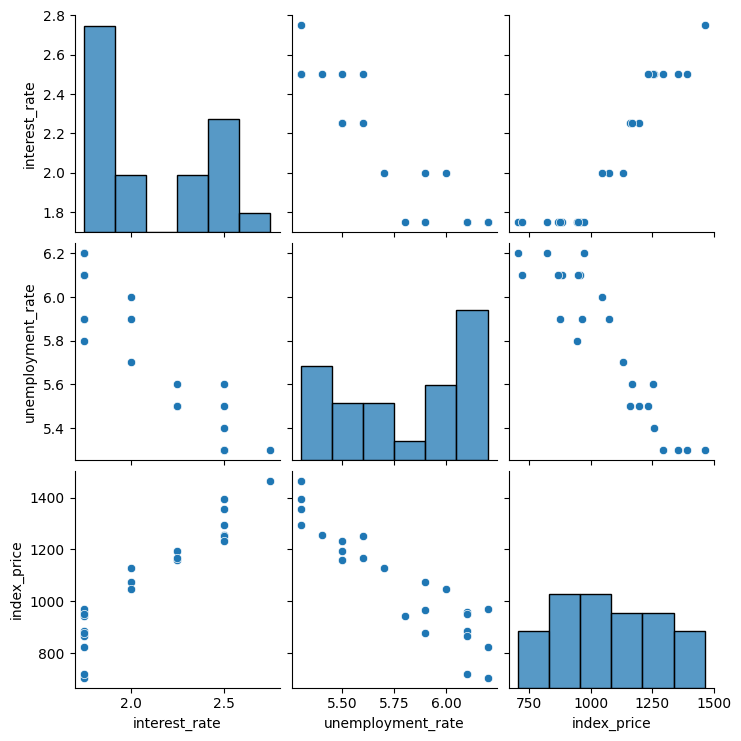

In [13]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(df_index)

In [15]:
df_index.corr() # gives idea about how the diffrent feature are related to different feature.

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

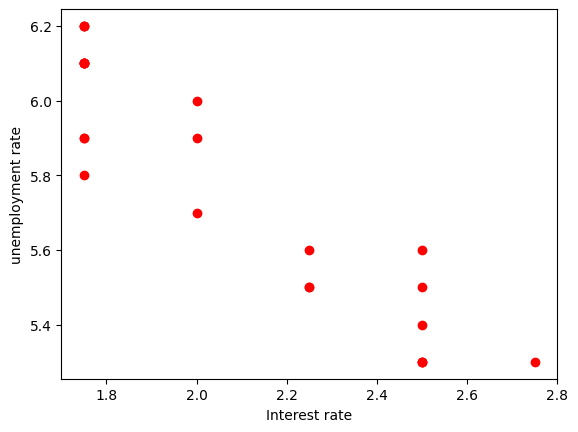

In [16]:
## Visualiza the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [18]:
##independent and dependent features
X=df_index.iloc[:,:-1]# from start till 2nd last
y=df_index.iloc[:,-1]# only last one

In [19]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [20]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


traninng our multiple linear regression model.

In [25]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

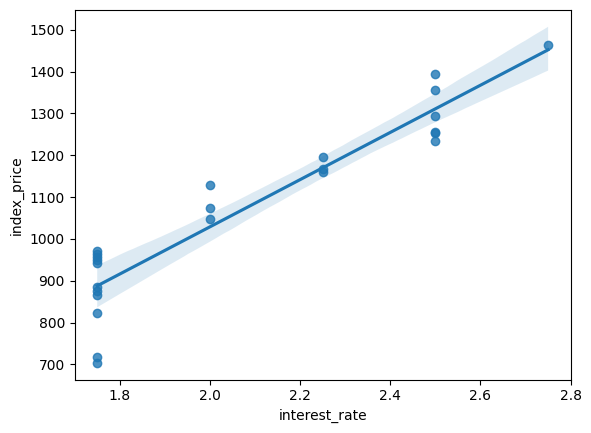

In [29]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)
# Use keyword arguments to specify the columns in the DataFrame

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

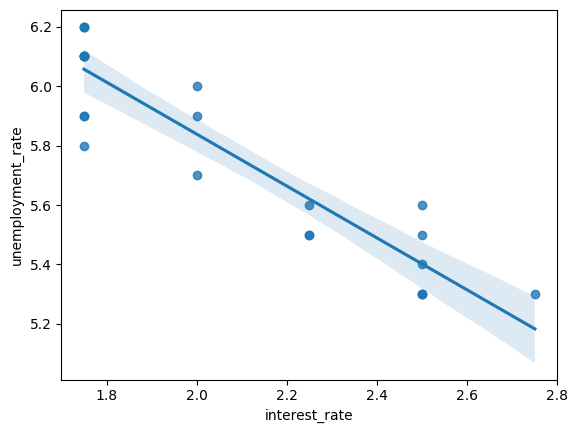

In [32]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df_index)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

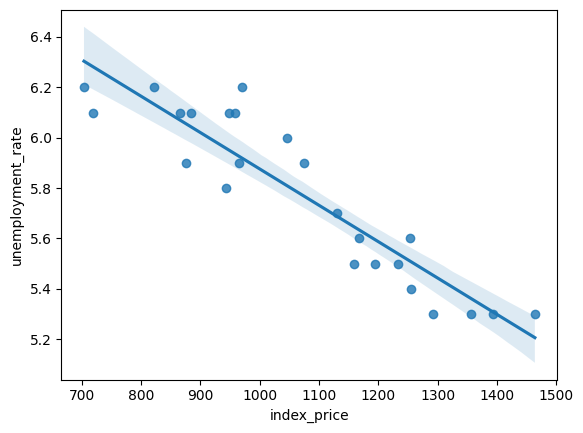

In [33]:
sns.regplot(x='index_price',y='unemployment_rate',data=df_index)

lets do **standerization** or make all the independent feature on same scale.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [36]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [37]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [39]:
#passing x_train,y_train to the regression
regression.fit(X_train,y_train)

LinearRegression()

In [42]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [43]:
np.mean(validation_score)

-5914.828180162386

**lets do testing.**

In [44]:
## prediction
y_pred=regression.predict(X_test)

In [46]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [47]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [48]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


## Assumptions

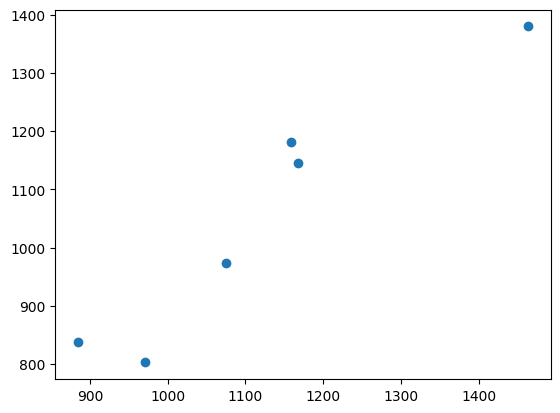

In [49]:
plt.scatter(y_test,y_pred)

In [50]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


**Bell-Shaped**: A bell-shaped KDE curve suggests that the model's residuals have a distribution close to a normal distribution. This is generally a good sign, indicating that the model fits the data well and that the assumption of normally distributed errors is reasonable.

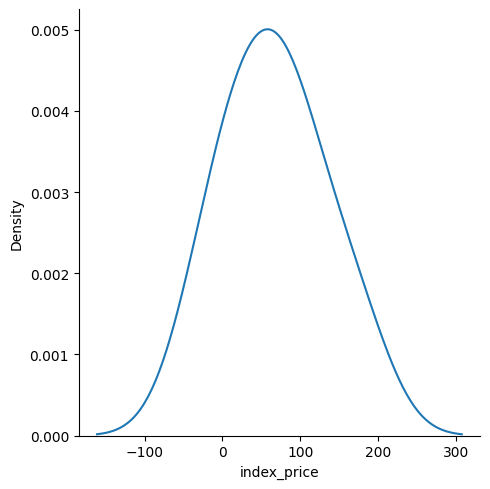

In [51]:
## Plot this residuals
sns.displot(residuals,kind='kde')

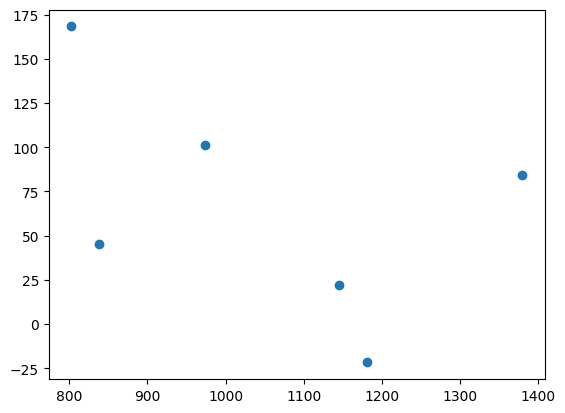

In [53]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)
# being more random mean model is good.

In [54]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [55]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 17 Aug 2024   Prob (F-statistic):                       0.754
Time:                        08:09:08   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
print(regression.coef_)

[  88.27275507 -116.25716066]
